## **Import Functions**


In [3]:
import math
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

#Define Activation functions


def pureline(X):
    return X;

def pureline_derivative(X):
    return np.ones_like(X)

# Leaky ReLU Activation Function
def leaky_relu(x, alpha=0.01):
    return np.maximum(alpha, x)

# Derivative of Leaky ReLU Activation Function
def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid Activation Function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Hyperbolic Tangent (Tanh) Activation Function
def tanh(x):
    return np.tanh(x)

# Derivative of Tanh Activation Function
def tanh_derivative(x):
    return 1 - tanh(x) ** 2

# Rectified Linear Unit (ReLU) Activation Function
def relu(x):
    return np.maximum(0, x)

# Derivative of ReLU Activation Function
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def pureline(X):
    return X;

def pureline_derivative(X):
    return np.ones_like(X)

def choose_function(x,name):
  if name == "relu":
    return relu(x)
  elif name == "tanh":
    return tanh(x)
  elif name == "sigmoid":
    return sigmoid(x)
  elif name == "leaky_relu":
    return leaky_relu(x)
  elif name == "pureline":
    return pureline(x)

def choose_function_derivate(x,name):
  if name == "relu":
    return relu_derivative(x)
  elif name == "tanh":
    return tanh_derivative(x)
  elif name == "sigmoid":
    return sigmoid_derivative(x)
  elif name == "leaky_relu":
    return leaky_relu_derivative(x)
  elif name == "pureline":
    return pureline_derivative(x)

def plot_regression_line(x, y, label):
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    x_line = np.linspace(min(x), max(x), 100)
    y_line = polynomial(x_line)
    plt.plot(x_line, y_line, label=label)


def createTimeSeries(data, number_shift):
    time_series_array = np.zeros((data.shape[0] - number_shift + 1, number_shift))

    # Populate the time series array
    for i in range(time_series_array.shape[0]):
        for j in range(number_shift):
            time_series_array[i, j] = float(data[i + j])

    return time_series_array

def LoadData(path):
  data = pd.read_excel(path, header=None).to_numpy()
  return data

# normalize the input features
def normalizeData(data):
  min_vals = np.min(data, axis=0)
  max_vals = np.max(data, axis=0)

  normalized_data = (data - min_vals) / (max_vals - min_vals)
  return normalized_data



## **Load Dataset**

In [4]:
file_path = '/content/sample_data/Video surveillance Dataset.xlsx'
data = LoadData(file_path)
number_feature = 150
data = createTimeSeries(data, number_feature)
data = normalizeData(data)


<ipython-input-3-eb47c2253c14>:92: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  time_series_array[i, j] = float(data[i + j])


## **initialize and Define Variables**

In [5]:
import random

num_data = data.shape[0]
percent_train = 0.70
percent_test = 0.30
percent_validation = 0.0

num_train = round(num_data * percent_train)
num_test = num_data - num_train

n0 = data.shape[1] - 1
n1 = 100
n2 = 60
n3 = 30

n0_perceptron = 30
n1_perceptron = 10
n2_perceptron = 1
eta_e=0.01
eta_e1 = 0.03
eta_e2 = 0.04
eta_e3 = 0.05
eta_p = 0.025

epochs = 100
epochs_ed = 30;

X_test , Y_test = data[num_train:,:n0],data[num_train:,n0]
X_train, Y_train = data[:num_train,:n0],data[:num_train,n0]



output_data_train = np.zeros(num_train)
output_data_test = np.zeros(num_test)
output_data_test_noisy = np.zeros(num_test)
mse_train = np.zeros(epochs)
mse_test = np.zeros(epochs)
mse_test_noisy = np.zeros(epochs)
mse_error_train = np.zeros((num_train,n2))
mse_error_test = np.zeros((num_test,n2))
mse_error_test_noisy = np.zeros((num_test,n2))




## **create layers**

In [6]:
act_functions = ["relu","tanh","sigmoid","leaky_relu","pureline"]

# Initialize Autoencoder weigths
w1_e = np.random.uniform(-1, 1, (n1, n0))
w2_e = np.random.uniform(-1, 1, (n2, n1))
w3_e = np.random.uniform(-1, 1, (n3, n2))
act_func_encoder = "sigmoid"

w1_d = np.random.uniform(-1, 1, (n0, n1))
w2_d = np.random.uniform(-1, 1, (n1, n2))
w3_d = np.random.uniform(-1, 1, (n2, n3))
act_func_decoder = "tanh"


## **FeedForward and BackPropagation Auto Encoder**


In [7]:
# Encoder 1 Local Train
for t in range(epochs_ed):
    error = np.zeros(n0)

    for i in range(num_train):
      # Feedforward
        X = X_train[i]

        # Encoder1
        net1_e = w1_e.dot(X) # n1
        o1_e = choose_function(net1_e,act_func_encoder) # n1

        # Decoder1
        net1_d = w1_d.dot(o1_e) # n0
        o1_d = choose_function(net1_d,act_func_decoder) # n0

      # Backpropagation

        target = np.copy(X) #n0
        error = target - o1_d # n0

        f_derivate_e = choose_function_derivate(net1_e,act_func_encoder) # n1
        f_derivate_e_diag = np.diagflat(f_derivate_e) # n1 * n1

        f_derivate_d = choose_function_derivate(net1_d,act_func_decoder) # n0 * n0
        f_derivate_d_diag = np.diagflat(f_derivate_d) # n0 * n0

        w1_d_old = np.copy(w1_d) # n0 * n1

        # update weights
        w1_d += eta_e1*error.reshape(-1,1).T.dot(f_derivate_d_diag).T.dot(o1_e.reshape(-1,1).T) # n0 * n1
        w1_e += eta_e1*error.reshape(-1,1).T.dot(f_derivate_d_diag).dot(w1_d_old).dot(f_derivate_e_diag).T.dot(X.reshape(-1,1).T) # n1 * n0
        # w1_e = np.copy(w1_d.T)


# Encoder 2 Local Train
for t in range(epochs_ed):
    error = np.zeros(n1)

    for i in range(num_train):
      # Feedforward
        X = X_train[i]

        # Encoder1
        net1_e = w1_e.dot(X) # n1
        o1_e = choose_function(net1_e,act_func_encoder) # n1

        # Encoder2
        net2_e = w2_e.dot(o1_e) # n2
        o2_e = choose_function(net2_e,act_func_encoder) # n2

        # Decoder2
        net2_d = w2_d.dot(o2_e) # n1
        o2_d = choose_function(net2_d,act_func_decoder) # n1

      # Backpropagation

        target = np.copy(o1_e) #n1
        error = target - o2_d # n1

        f_derivate_e = choose_function_derivate(net2_e,act_func_encoder) # n2
        f_derivate_e_diag = np.diagflat(f_derivate_e) # n2 * n2

        f_derivate_d = choose_function_derivate(net2_d,act_func_decoder) # n1 * n1
        f_derivate_d_diag = np.diagflat(f_derivate_d) # n1 * n1

        w2_d_old = np.copy(w2_d) # n1 * n2

        # update weights
        w2_d += eta_e2*error.reshape(-1,1).T.dot(f_derivate_d_diag).T.dot(o2_e.reshape(-1,1).T) # n1 * n2
        w2_e += eta_e2*error.reshape(-1,1).T.dot(f_derivate_d_diag).dot(w2_d_old).dot(f_derivate_e_diag).T.dot(o1_e.reshape(-1,1).T) # n2 * n1
        # w2_e = np.copy(w2_d.T)

# Encoder 3 Local Train
for t in range(epochs_ed):
    error = np.zeros(n2)

    for i in range(num_train):
      # Feedforward
        X = X_train[i]

        # Encoder1
        net1_e = w1_e.dot(X) # n1
        o1_e = choose_function(net1_e,act_func_encoder) # n1

        # Encoder2
        net2_e = w2_e.dot(o1_e) # n2
        o2_e = choose_function(net2_e,act_func_encoder) # n2

        # Encoder3
        net3_e = w3_e.dot(o2_e) # n3
        o3_e = choose_function(net3_e,act_func_encoder) # n3

        # Decoder3
        net3_d = w3_d.dot(o3_e) # n2
        o3_d = choose_function(net3_d,act_func_decoder) # n2

      # Backpropagation

        target = np.copy(o2_e) #n2
        error = target - o3_d # n2

        f_derivate_e = choose_function_derivate(net3_e,act_func_encoder) # n3
        f_derivate_e_diag = np.diagflat(f_derivate_e) # n3 * n3

        f_derivate_d = choose_function_derivate(net3_d,act_func_decoder) # n2 * n2
        f_derivate_d_diag = np.diagflat(f_derivate_d) # n2 * n2

        w3_d_old = np.copy(w3_d) # n2 * n3

        # update weights
        w3_d += eta_e3*error.reshape(-1,1).T.dot(f_derivate_d_diag).T.dot(o3_e.reshape(-1,1).T) # n2 * n3
        w3_e += eta_e3*error.reshape(-1,1).T.dot(f_derivate_d_diag).dot(w3_d_old).dot(f_derivate_e_diag).T.dot(o2_e.reshape(-1,1).T) # n3 * n2
        # w3_e = np.copy(w3_d.T)


## **Create Layer Perceptron**

In [8]:
act_functions = ["relu","tanh","sigmoid","leaky_relu","pureline"]

# Initialize Perceptron weigths
w1_p = np.random.uniform(-1, 1, (n1_perceptron, n0_perceptron))
act_layer1_p = "sigmoid"

w2_p = np.random.uniform(-1, 1, (n2_perceptron, n1_perceptron))
act_layer2_p = "sigmoid"


## **FeedForward and BackPropagation Perceptron**


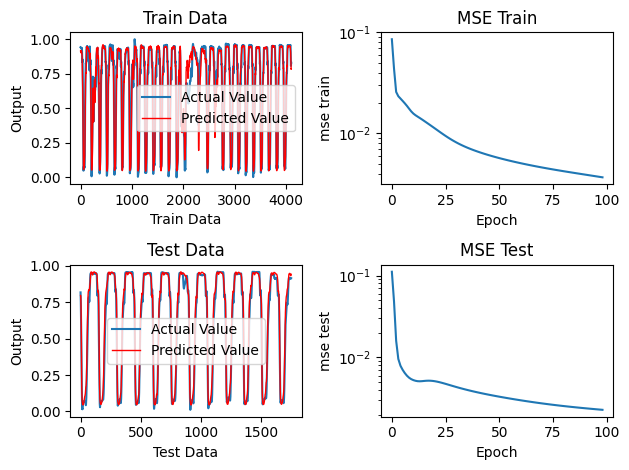

In [9]:
for t in range(epochs):
    error = np.zeros(n2_perceptron)

    for i in range(num_train):
      # Feedforward
        X = X_train[i]

        # Encoder1
        net1_e = w1_e.dot(X) # n1
        o1_e = choose_function(net1_e,act_func_encoder) # n1

        # Encoder2
        net2_e = w2_e.dot(o1_e) # n2
        o2_e = choose_function(net2_e,act_func_encoder) # n2

        # Encoder3
        net3_e = w3_e.dot(o2_e) # n3
        o3_e = choose_function(net3_e,act_func_encoder) # n3

        # layer 1 Perceptron
        net1_p = w1_p.dot(o3_e) # n1_p
        o1_p = choose_function(net1_p,act_layer1_p) # n1_p

        # layer 2 Perceptron
        net2_p = w2_p.dot(o1_p) # n2_p
        o2_p = choose_function(net2_p,act_layer2_p) # n2_p

      # Backpropagation

        target = Y_train[i] # n2_p
        error = target - o2_p # n2_p


        f_derivate_p1_diag = np.diagflat(choose_function_derivate(net1_p,act_layer1_p)) # n1_p * n1_p
        f_derivate_p2_diag = np.diagflat(choose_function_derivate(net2_p,act_layer2_p)) # n2_p * n2_p

        f_derivate_e1_diag = np.diagflat(choose_function_derivate(net1_e,act_func_encoder)) # n1 * n1
        f_derivate_e2_diag = np.diagflat(choose_function_derivate(net2_e,act_func_encoder)) # n2 * n2
        f_derivate_e3_diag = np.diagflat(choose_function_derivate(net3_e,act_func_encoder)) # n3 * n3

        w2_p_old = np.copy(w2_p) # n2_p * n1_p
        w1_p_old = np.copy(w1_p) # n2_p * n1_p
        w3_e_old = np.copy(w3_e) # n3 * n2
        w2_e_old = np.copy(w2_e) # n2 * n1


        # update weights perceptron
        w2_p += eta_p * error.reshape(-1,1).T.dot(f_derivate_p2_diag).T.dot(o1_p.reshape(-1,1).T) # n2_p * n1_p
        w1_p += eta_p * error.reshape(-1,1).T.dot(f_derivate_p2_diag).dot(w2_p_old).dot(f_derivate_p1_diag).T.dot(o3_e.reshape(-1,1).T) # n1_p * n0_p

        # update weights Encoder

        w3_e += eta_p * error.reshape(-1,1).T.dot(f_derivate_p2_diag).dot(w2_p_old).dot(f_derivate_p1_diag).dot(w1_p_old).dot(f_derivate_e3_diag).T.dot(o2_e.reshape(-1,1).T) # n3 * n2
        w2_e += eta_p * error.reshape(-1,1).T.dot(f_derivate_p2_diag).dot(w2_p_old).dot(f_derivate_p1_diag).dot(w1_p_old).dot(f_derivate_e3_diag).dot(w3_e_old).dot(f_derivate_e2_diag).T.dot(o1_e.reshape(-1,1).T) # n2 * n1
        w1_e += eta_p * error.reshape(-1,1).T.dot(f_derivate_p2_diag).dot(w2_p_old).dot(f_derivate_p1_diag).dot(w1_p_old).dot(f_derivate_e3_diag).dot(w3_e_old).dot(f_derivate_e2_diag).dot(w2_e_old).dot(f_derivate_e1_diag).T.dot(X.reshape(-1,1).T) # n1 * n0


    for i in range(num_train):

        X = X_train[i]
        # Encoder1
        net1_e = w1_e.dot(X) # n1
        o1_e = choose_function(net1_e,act_func_encoder) # n1

        # Encoder2
        net2_e = w2_e.dot(o1_e) # n2
        o2_e = choose_function(net2_e,act_func_encoder) # n2

        # Encoder3
        net3_e = w3_e.dot(o2_e) # n3
        o3_e = choose_function(net3_e,act_func_encoder) # n3

        # layer 1 Perceptron
        net1_p = w1_p.dot(o3_e) # n1_p
        o1_p = choose_function(net1_p,act_layer1_p) # n1_p

        # layer 2 Perceptron
        net2_p = w2_p.dot(o1_p) # n2_p
        o2_p = choose_function(net2_p,act_layer2_p) # n2_p

        mse_error_train[i] = Y_train[i] - o2_p
        output_data_train[i] = o2_p

    for i in range(num_test):

        X = X_test[i]
        # Encoder1
        net1_e = w1_e.dot(X) # n1
        o1_e = choose_function(net1_e,act_func_encoder) # n1

        # Encoder2
        net2_e = w2_e.dot(o1_e) # n2
        o2_e = choose_function(net2_e,act_func_encoder) # n2

        # Encoder3
        net3_e = w3_e.dot(o2_e) # n3
        o3_e = choose_function(net3_e,act_func_encoder) # n3

        # layer 1 Perceptron
        net1_p = w1_p.dot(o3_e) # n1_p
        o1_p = choose_function(net1_p,act_layer1_p) # n1_p

        # layer 2 Perceptron
        net2_p = w2_p.dot(o1_p) # n2_p
        o2_p = choose_function(net2_p,act_layer2_p) # n2_p

        mse_error_test[i] = Y_test[i] - o2_p
        output_data_test[i] = o2_p




    mse_train[t] = np.mean(mse_error_train**2)
    mse_test[t] = np.mean(mse_error_test**2)

    fig=plt.figure(2)
    plt.subplot(2, 2, 1)
    plt.cla()  # Clear the previous plot
    plt.plot(Y_train, label="Actual Value")
    plt.plot(output_data_train, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Train Data')
    plt.xlabel('Train Data')
    plt.ylabel('Output')

    # The MSE train data plot
    plt.subplot(2, 2, 2)
    plt.cla()
    plt.semilogy(mse_train[:t])
    plt.title('MSE Train')
    plt.xlabel('Epoch')
    plt.ylabel('mse train')
    fig.tight_layout()

    plt.subplot(2, 2, 3)
    plt.cla()
    plt.plot(Y_test, label="Actual Value")
    plt.plot(output_data_test, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Test Data')
    plt.xlabel('Test Data')
    plt.ylabel('Output')

    # MSE test data plot
    plt.subplot(2, 2, 4)
    plt.cla()
    plt.semilogy(mse_test[:t])
    plt.title('MSE Test')
    plt.xlabel('Epoch')
    plt.ylabel('mse test')
    fig.tight_layout()
    display(plt.gcf())

    clear_output(wait=True)

## **Regression Plot**

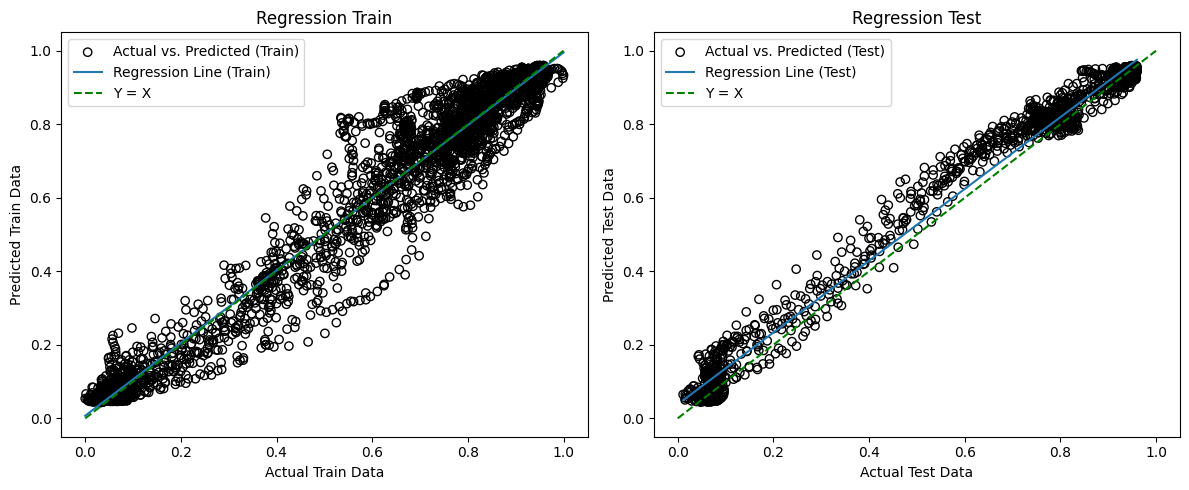

In [10]:
import matplotlib.pyplot as plt
numb_shift = number_feature
# Regression Train Plot
plt.figure(5, figsize=(12, 5))
numb_shift-=1

plt.subplot(1, 2, 1)
plt.scatter(data[:num_train, numb_shift], output_data_train, label='Actual vs. Predicted (Train)', marker='o', edgecolors='black', facecolors='none')
plot_regression_line(data[:num_train, numb_shift], output_data_train, 'Regression Line (Train)')
plt.plot([min(data[:, numb_shift]), max(data[:, numb_shift])], [min(data[:, numb_shift]), max(data[:, numb_shift])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Train Data')
plt.ylabel('Predicted Train Data')
plt.title('Regression Train')
plt.legend()

# Regression Test Plot
plt.subplot(1, 2, 2)
plt.scatter(data[num_train:num_train + num_test, numb_shift], output_data_test[:num_test], label='Actual vs. Predicted (Test)', marker='o', edgecolors='black', facecolors='none')
plot_regression_line(data[num_train:num_train + num_test, numb_shift], output_data_test[:num_test], 'Regression Line (Test)')
plt.plot([min(data[:, numb_shift]), max(data[:, numb_shift])], [min(data[:, numb_shift]), max(data[:, numb_shift])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Test Data')
plt.ylabel('Predicted Test Data')
plt.title('Regression Test')
plt.legend()

plt.tight_layout()
plt.show()


In [11]:
print("The MSE of Train is : ")
for i in range(len(mse_train)):
  print(f"Epoch {i+1} : {mse_train[i]}")

print("\n\nThe MSE of test is : ")
for i in range(len(mse_test)):
  print(f"Epoch {i+1} : {mse_test[i]}")


The MSE of Train is : 
Epoch 1 : 0.08548676572207652
Epoch 2 : 0.043874912811325245
Epoch 3 : 0.025728392667964128
Epoch 4 : 0.02333305490219355
Epoch 5 : 0.0221357681769165
Epoch 6 : 0.020989535356506127
Epoch 7 : 0.019867881751042607
Epoch 8 : 0.018733921712751657
Epoch 9 : 0.017574742941985196
Epoch 10 : 0.016518616328470438
Epoch 11 : 0.015713391347109393
Epoch 12 : 0.01513133717225385
Epoch 13 : 0.014651904800749049
Epoch 14 : 0.014200775137757582
Epoch 15 : 0.013748993242692272
Epoch 16 : 0.013299061850512554
Epoch 17 : 0.012858504702863484
Epoch 18 : 0.012429851622732458
Epoch 19 : 0.012012434113022639
Epoch 20 : 0.011605379107734697
Epoch 21 : 0.011208896684242787
Epoch 22 : 0.010824297506080794
Epoch 23 : 0.01045351389994462
Epoch 24 : 0.010098576200813957
Epoch 25 : 0.009761229076736024
Epoch 26 : 0.00944272407584514
Epoch 27 : 0.009143754712552766
Epoch 28 : 0.008864480161051319
Epoch 29 : 0.008604591874738336
Epoch 30 : 0.008363395790228894
Epoch 31 : 0.008139898453233076
E